**Loading all libraries requied for the analysis**

In [1]:
#Load all libraries requied for the analysis
import pandas as pd
import numpy as np
np.random.seed(0)
pd.set_option('precision', 4)
pd.set_option('display.max_colwidth', 200)

import matplotlib.pyplot as plt; plt.rcdefaults();plt.rc("font", size=14)
import seaborn as sns; sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score,precision_score

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Loading the Data

In [2]:
data = pd.read_csv('divorce.csv', sep = ';')
data.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [3]:
explanatory = data.drop('Class', axis=1)
dependent = data[['Class']]

In [4]:
print('The dataset contains {} instances and {} attributes'.format(data.shape[0], explanatory.shape[1]))

The dataset contains 170 instances and 54 attributes


**Attribute Information:**

In [5]:
factors = open('divorcefactors.txt').read()
factors = factors.replace('\t', '\n').split('\n')

predictors=list(explanatory)
Attributes = pd.DataFrame({
    'features': predictors,
    'factor': factors})
Attributes

,features,factor
0,Atr1,"If one of us apologizes when our discussion deteriorates, the discussion ends."
1,Atr2,"I know we can ignore our differences, even if things get hard sometimes."
2,Atr3,"When we need it, we can take our discussions with my spouse from the beginning and correct it."
3,Atr4,"When I discuss with my spouse, to contact him will eventually work."
4,Atr5,The time I spent with my wife is special for us.
5,Atr6,We don't have time at home as partners.
6,Atr7,We are like two strangers who share the same environment at home rather than family.
7,Atr8,I enjoy our holidays with my wife.
8,Atr9,I enjoy traveling with my wife.
9,Atr10,Most of our goals are common to my spouse.


**Exploratory Data Analysis**

In [6]:
#Get a concise summary of a DataFrame to check for null values and data type of each variable in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
Atr1     170 non-null int64
Atr2     170 non-null int64
Atr3     170 non-null int64
Atr4     170 non-null int64
Atr5     170 non-null int64
Atr6     170 non-null int64
Atr7     170 non-null int64
Atr8     170 non-null int64
Atr9     170 non-null int64
Atr10    170 non-null int64
Atr11    170 non-null int64
Atr12    170 non-null int64
Atr13    170 non-null int64
Atr14    170 non-null int64
Atr15    170 non-null int64
Atr16    170 non-null int64
Atr17    170 non-null int64
Atr18    170 non-null int64
Atr19    170 non-null int64
Atr20    170 non-null int64
Atr21    170 non-null int64
Atr22    170 non-null int64
Atr23    170 non-null int64
Atr24    170 non-null int64
Atr25    170 non-null int64
Atr26    170 non-null int64
Atr27    170 non-null int64
Atr28    170 non-null int64
Atr29    170 non-null int64
Atr30    170 non-null int64
Atr31    170 non-null int64
Atr32    170 non-null int64

In [7]:
#Produce a correlation matrix of the explanatory variables. 
explanatory.corr()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
Atr1,1.0000,0.8191,0.8325,0.8251,0.8813,0.2871,0.4280,0.8024,0.8459,0.7902,...,0.5102,0.4003,0.5827,0.6336,0.6748,0.7254,0.6841,0.5755,0.6114,0.7685
Atr2,0.8191,1.0000,0.8059,0.7913,0.8194,0.1028,0.4176,0.8643,0.8277,0.7823,...,0.4891,0.3895,0.6169,0.6438,0.6598,0.6805,0.6366,0.5363,0.6107,0.7289
Atr3,0.8325,0.8059,1.0000,0.8067,0.8008,0.2630,0.4641,0.7573,0.8167,0.7530,...,0.4274,0.3081,0.5449,0.6383,0.6480,0.6640,0.6006,0.4918,0.5987,0.6730
Atr4,0.8251,0.7913,0.8067,1.0000,0.8185,0.1860,0.4748,0.7983,0.8291,0.8736,...,0.4468,0.3402,0.5523,0.6302,0.6991,0.6853,0.6240,0.5343,0.5884,0.6983
Atr5,0.8813,0.8194,0.8008,0.8185,1.0000,0.2978,0.3814,0.8776,0.9163,0.8237,...,0.5917,0.4708,0.7199,0.6592,0.7623,0.7960,0.7427,0.6639,0.7195,0.8368
Atr6,0.2871,0.1028,0.2630,0.1860,0.2978,1.0000,0.4242,0.1840,0.3013,0.2661,...,0.0948,0.1278,0.2130,0.2007,0.2011,0.2211,0.1791,0.2051,0.2581,0.2924
Atr7,0.4280,0.4176,0.4641,0.4748,0.3814,0.4242,1.0000,0.4128,0.5175,0.4983,...,0.1995,0.0698,0.2542,0.3111,0.2913,0.3324,0.3499,0.2431,0.3137,0.3475
Atr8,0.8024,0.8643,0.7573,0.7983,0.8776,0.1840,0.4128,1.0000,0.9153,0.8280,...,0.5425,0.4335,0.6756,0.5885,0.6748,0.7297,0.6902,0.6586,0.7051,0.8079
Atr9,0.8459,0.8277,0.8167,0.8291,0.9163,0.3013,0.5175,0.9153,1.0000,0.8524,...,0.5753,0.4343,0.6938,0.6117,0.7115,0.7555,0.7138,0.6524,0.6992,0.8110
Atr10,0.7902,0.7823,0.7530,0.8736,0.8237,0.2661,0.4983,0.8280,0.8524,1.0000,...,0.4358,0.3423,0.5600,0.5503,0.6596,0.6722,0.6187,0.5138,0.5926,0.6985


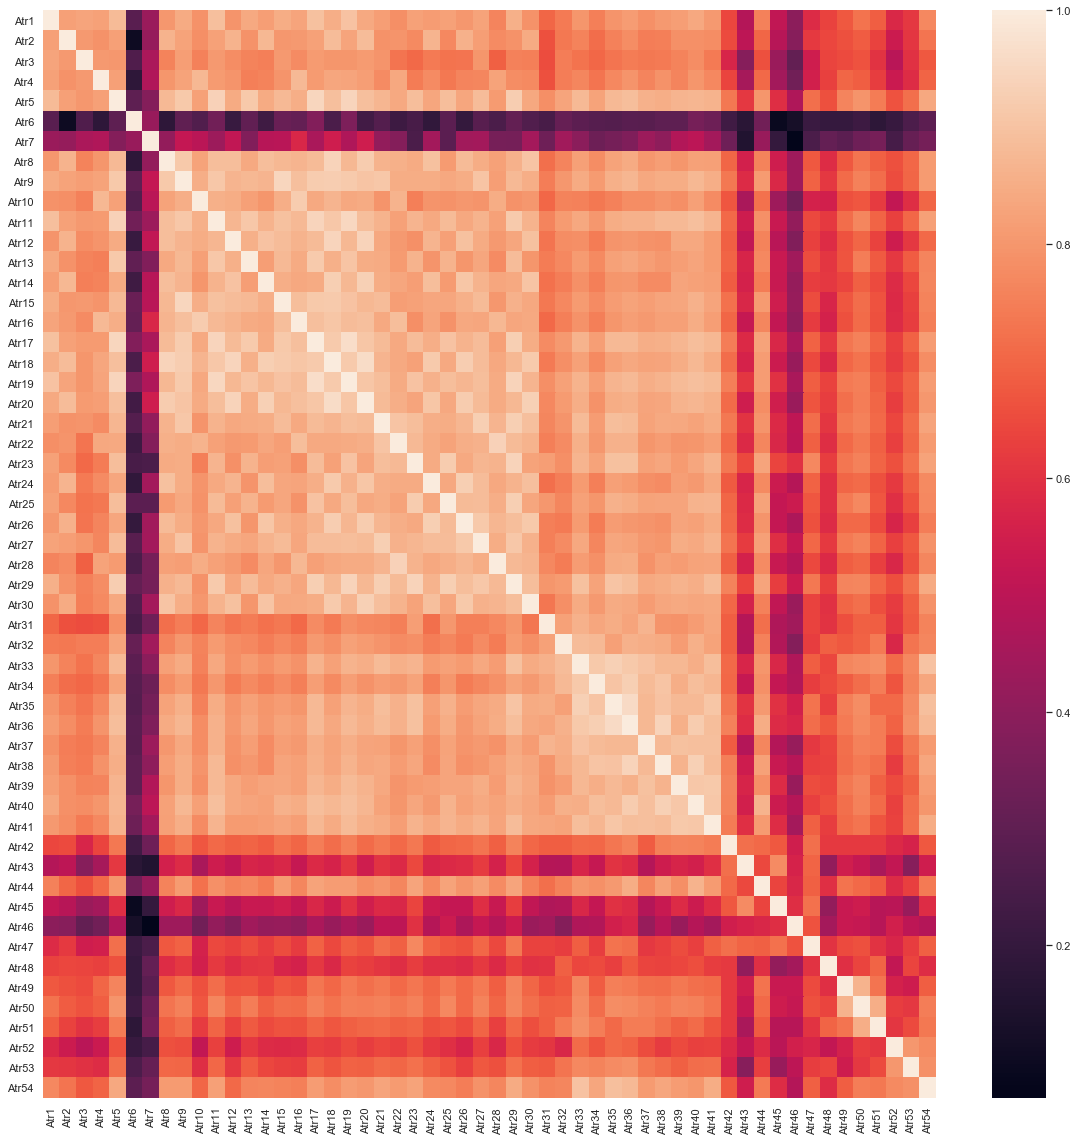

In [8]:
#Make a heat-map of the correlation matrix of the predictor variables
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(explanatory.corr())
plt.show()

In [9]:
def conf_matrix(y_test, y_predict):
    '''
    A function to create and format a confusion matrix with labels
    '''
    # Create the raw confusion matrix
    conf = confusion_matrix(y_test, y_predict)

    # Format the confusion matrix nicely
    conf = pd.DataFrame(data=conf)
    conf.columns.name = 'Predicted label'
    conf.index.name = 'Actual label'

    # Return the confusion matrix
    return conf

### Create a baseline classification model using all the features

**Logistic Regression**

In [10]:
#Splitting our data into train train and test samples
#Training is 80% and Testing is 20% of data
X_train, X_test, y_train, y_test = train_test_split(explanatory, dependent, test_size=0.2)

y = y_train
X = X_train

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response for new observations
Yhat = logreg.predict(X_test)
Yhat

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [11]:
# Create the confusion matrix
conf = conf_matrix(y_test, Yhat)

print('-----------------------------------------')
# Output the confusion matrix
print('Using logistic regression with all features, the confusion matrix is \n', conf)
print('The accuracy is {}%'.format(accuracy_score(y_test, Yhat)*100))
print('The F1_score is', f1_score(y_test, Yhat))
print('The sensitivity / recall is', recall_score(y_test, Yhat))
print('The precision is', precision_score(y_test, Yhat))

-----------------------------------------
Using logistic regression with all features, the confusion matrix is 
 Predicted label   0   1
Actual label           
0                15   1
1                 2  16
The accuracy is 91.17647058823529%
The F1_score is 0.9142857142857143
The sensitivity / recall is 0.8888888888888888
The precision is 0.9411764705882353


### Feature Selection Using Random forest

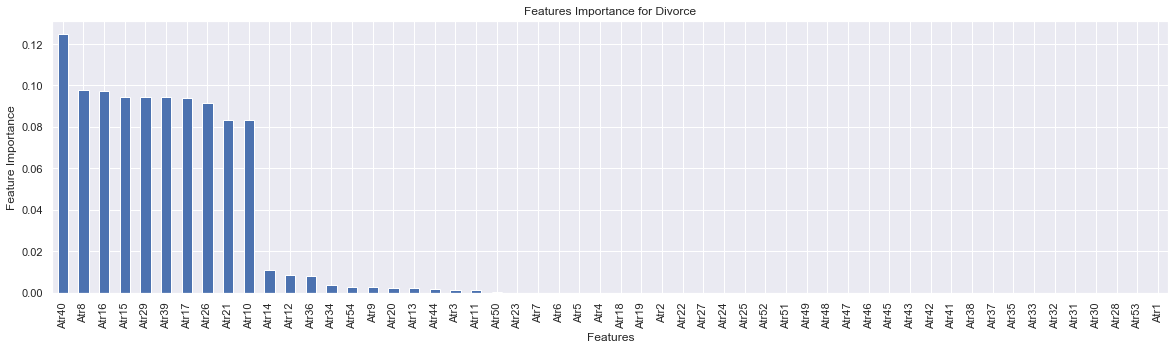

In [12]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(clf.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Features Importance for Divorce',figsize=(20,5))
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.show()

**Most important predictors**

In [13]:
feat_impDF = pd.DataFrame(feat_imp, columns=['value'])
feat_impDF.reset_index(inplace=True)
feat_impDF.columns = ['features', 'value']
feats = pd.merge(feat_impDF,Attributes, on='features')
most_important =feats[feats['value']>0]
most_important

,features,value,factor
0,Atr40,0.1250,We're just starting a discussion before I know what's going on.
1,Atr8,0.0978,I enjoy our holidays with my wife.
2,Atr16,0.0971,We're compatible with my spouse about what love should be.
3,Atr15,0.0943,Our dreams with my spouse are similar and harmonious.
4,Atr29,0.0943,I know my spouse very well.
5,Atr39,0.0942,Our discussions often occur suddenly.
6,Atr17,0.0941,We share the same views about being happy in our life with my spouse
7,Atr26,0.0915,I know my spouse's basic anxieties.
8,Atr21,0.0835,I know exactly what my wife likes.
9,Atr10,0.0831,Most of our goals are common to my spouse.


In [14]:
print('Out of the {} factors outlined in the form, \
Only {} of them have a great impact on divorce'.format(len(Attributes), len(most_important)))

print('Below are the major factor that influence a divorce decision:')
for j,k in enumerate([i for i in most_important['factor']]):
    print('{}: {}'.format(j+1, k))

Out of the 54 factors outlined in the form, Only 22 of them have a great impact on divorce
Below are the major factor that influence a divorce decision:
1: We're just starting a discussion before I know what's going on.
2: I enjoy our holidays with my wife.
3: We're compatible with my spouse about what love should be.
4: Our dreams with my spouse are similar and harmonious.
5: I know my spouse very well.
6: Our discussions often occur suddenly.
7: We share the same views about being happy in our life with my spouse
8: I know my spouse's basic anxieties.
9: I know exactly what my wife likes.
10: Most of our goals are common to my spouse.
11: Most of our goals for people (children, friends, etc.) are the same.
12: My spouse and I have similar values in terms of personal freedom.
13: I can be humiliating when we discussions.
14: I can use offensive expressions during our discussions.
15: I'm not afraid to tell my spouse about her/his incompetence.
16: I enjoy traveling with my wife.
17: M

### Final evaluation of models using only the important features

**Logistic Regression model**

In [15]:
#Retaining only selected features in the training and test set
X_train2, X_test2, y_train2, y_test2 = X_train[most_important.features], X_test[most_important.features], y_train, y_test


y2 = y_train2
X2 = X_train2

# instantiate the Logistic Regression model (using the default parameters)
logreg2 = LogisticRegression()

# fit the model with data
logreg2.fit(X2, y2)

# predict the response for new observations
Yhat2 = logreg2.predict(X_test2)
print(Yhat2)

[0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1]


In [16]:
# Create the confusion matrix
conf2 = conf_matrix(y_test2, Yhat2)

print('-----------------------------------------')
# Output the confusion matrix
print('Using logistic regression with only the most important features: \nThe confusion matrix is: \n', conf2)
print('The accuracy is {}%'.format(accuracy_score(y_test2, Yhat2)*100))
print('The F1_score is', f1_score(y_test2, Yhat2))
print('The sensitivity / recall is', recall_score(y_test2, Yhat2))
print('The precision is', precision_score(y_test2, Yhat2))

-----------------------------------------
Using logistic regression with only the most important features: 
The confusion matrix is: 
 Predicted label   0   1
Actual label           
0                16   0
1                 2  16
The accuracy is 94.11764705882352%
The F1_score is 0.9411764705882353
The sensitivity / recall is 0.8888888888888888
The precision is 1.0


## Ensemble methods

**1. Bagging: Random Forest Classifier**

In [17]:
# instantiate the Random Forest Classifier
RF = RandomForestClassifier()

# fit the model with data
RF.fit(X2, y2)

# predict the response for new observations
RFYhat = RF.predict(X_test2)
RFYhat

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [18]:
# Create the confusion matrix
RFconf = conf_matrix(y_test2, RFYhat)

print('-----------------------------------------')
# Output the confusion matrix
print('Using Random Forest with the most important features, \nThe confusion matrix is \n', RFconf)
print('The accuracy is {}%'.format(accuracy_score(y_test2, RFYhat)*100))
print('The accuracy is {}%'.format(accuracy_score(y_test2, Yhat2)*100))
print('The F1_score is', f1_score(y_test2, RFYhat))
print('The sensitivity / recall is', recall_score(y_test2, RFYhat))
print('The precision is', precision_score(y_test2, RFYhat))

-----------------------------------------
Using Random Forest with the most important features, 
The confusion matrix is 
 Predicted label   0   1
Actual label           
0                16   0
1                 2  16
The accuracy is 94.11764705882352%
The accuracy is 94.11764705882352%
The F1_score is 0.9411764705882353
The sensitivity / recall is 0.8888888888888888
The precision is 1.0


**2. Boosting: Gradient Boosting Classifier**

In [19]:
# instantiate the Gradient Boosting Classifier
GB = GradientBoostingClassifier()

# fit the model with data
GB.fit(X2, y2)

# predict the response for new observations
GBYhat = GB.predict(X_test2)
GBYhat

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [20]:
# Create the confusion matrix
GBconf = conf_matrix(y_test2, GBYhat)

print('-----------------------------------------')
# Output the confusion matrix
print('Using Gradient Boosting with the most important attributes, the confusion matrix is \n', GBconf)
print('The accuracy is {}%'.format(accuracy_score(y_test2, GBYhat)*100))
print('The F1_score is', f1_score(y_test2, GBYhat))
print('The sensitivity / recall is', recall_score(y_test2, GBYhat))
print('The precision is', precision_score(y_test2, GBYhat))

-----------------------------------------
Using Gradient Boosting with the most important attributes, the confusion matrix is 
 Predicted label   0   1
Actual label           
0                16   0
1                 2  16
The accuracy is 94.11764705882352%
The F1_score is 0.9411764705882353
The sensitivity / recall is 0.8888888888888888
The precision is 1.0
